Russian Car Plates Prices Prediction

Important Libraries Importes

In [2]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from pylab import rcParams
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
warnings.filterwarnings("ignore")

Datasets Import

In [5]:
test=pd.read_csv("/Users/avinashmagar/Documents/DataScience/python/Dataset/russian_car_datasets/test.csv")
test.head()

,id,plate,date,price
0,51636,P700TT790,2025-01-27 00:00:00,NaN
1,51637,M081TX797,2025-02-10 00:00:00,NaN
2,51638,T333HX777,2025-02-11 00:00:00,NaN
3,51639,H744BH977,2025-02-03 00:00:00,NaN
4,51640,X066EM777,2025-02-12 00:00:00,NaN


In [6]:
train=pd.read_csv("/Users/avinashmagar/Documents/DataScience/python/Dataset/russian_car_datasets/train.csv")
train.head()

,id,plate,date,price
0,1,X059CP797,2024-12-26 00:00:00,65000
1,2,Y800MH790,2024-07-12 21:31:37,100000
2,3,A212TX77,2024-04-18 00:00:00,290000
3,4,P001AY199,2025-01-03 00:27:15,680000
4,5,P001AY199,2025-01-10 09:32:41,750000


Describe Datasets

In [7]:
print(test.describe)

<bound method NDFrame.describe of          id      plate                 date  price
0     51636  P700TT790  2025-01-27 00:00:00    NaN
1     51637  M081TX797  2025-02-10 00:00:00    NaN
2     51638  T333HX777  2025-02-11 00:00:00    NaN
3     51639  H744BH977  2025-02-03 00:00:00    NaN
4     51640  X066EM777  2025-02-12 00:00:00    NaN
...     ...        ...                  ...    ...
7690  59326  X799CC799  2023-03-13 00:00:00    NaN
7691  59327  K077YT777  2022-10-19 00:00:00    NaN
7692  59328  O200PA777  2023-10-02 19:19:30    NaN
7693  59329   O073OO97  2025-01-12 00:00:00    NaN
7694  59330  A666YE790  2025-01-13 00:00:00    NaN

[7695 rows x 4 columns]>


In [8]:
print(train.describe)

<bound method NDFrame.describe of           id      plate                 date    price
0          1  X059CP797  2024-12-26 00:00:00    65000
1          2  Y800MH790  2024-07-12 21:31:37   100000
2          3   A212TX77  2024-04-18 00:00:00   290000
3          4  P001AY199  2025-01-03 00:27:15   680000
4          5  P001AY199  2025-01-10 09:32:41   750000
...      ...        ...                  ...      ...
51630  51631  X023PP797  2025-01-29 00:00:00    70000
51631  51632  M004KA161  2025-01-31 00:00:00  1600000
51632  51633  E888EB199  2025-02-06 00:00:00   850000
51633  51634   X023XK77  2024-04-24 11:30:07   150000
51634  51635  K450OC797  2023-10-06 00:00:00    25000

[51635 rows x 4 columns]>


Information Of Datasets

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7695 entries, 0 to 7694
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      7695 non-null   int64  
 1   plate   7695 non-null   object 
 2   date    7695 non-null   object 
 3   price   0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 240.6+ KB


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51635 entries, 0 to 51634
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      51635 non-null  int64 
 1   plate   51635 non-null  object
 2   date    51635 non-null  object
 3   price   51635 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.6+ MB


Shape Of Datasets

In [11]:
train.shape

(51635, 4)

In [12]:
test.shape

(7695, 4)

Size Of Datasets

In [13]:
test.size

30780

In [14]:
train.size

206540

Null Values In Datasets

In [15]:
test.isna()

,id,plate,date,price
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
7690,False,False,False,True
7691,False,False,False,True
7692,False,False,False,True
7693,False,False,False,True


In [16]:
test.isna().sum()

id          0
plate       0
date        0
price    7695
dtype: int64

In [17]:
train.isna()

,id,plate,date,price
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
51630,False,False,False,False
51631,False,False,False,False
51632,False,False,False,False
51633,False,False,False,False


In [18]:
train.isna().sum()

id       0
plate    0
date     0
price    0
dtype: int64

Treating Null Values

In [36]:
train['price'].dtype

dtype('int64')

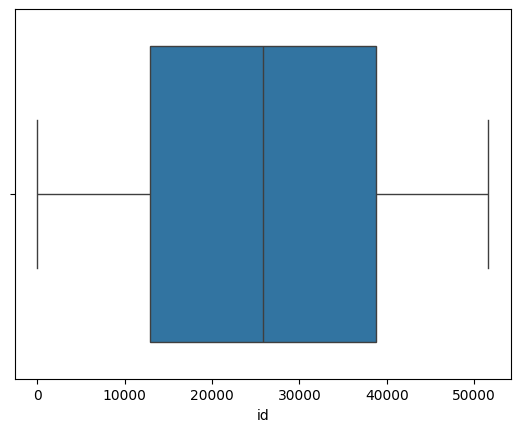

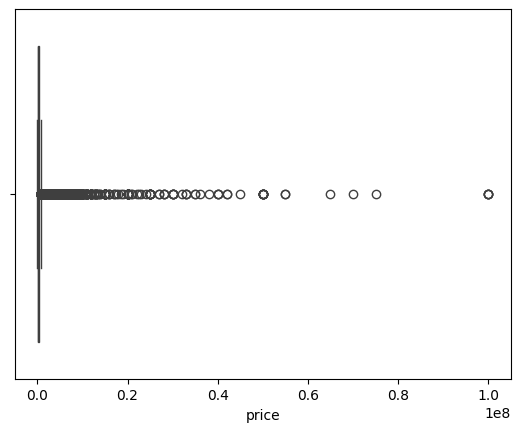

In [37]:
for i in train.select_dtypes(include=np.number).columns:
    sns.boxplot(x=train[i])        
    plt.show()

In [39]:
encoder = LabelEncoder()
train['price']=train['price'] = encoder.fit_transform(train['price'])
train['price'].value_counts()

price
129    3127
56     2791
178    2391
221    2227
73     2176
       ... 
387       1
711       1
709       1
71        1
537       1
Name: count, Length: 798, dtype: int64

In [42]:
train_numeric = train.drop(columns=['price'])

from sklearn.preprocessing import MinMaxScaler

# Apply scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(train_numeric), columns=train_numeric.columns)

# Display scaled data (without 'Closed_acc')
print(df_scaled)

ValueError: could not convert string to float: 'X059CP797'